In [44]:
import os 
while 'notebooks' in os.getcwd():
    os.chdir("..")
    
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv
from tqdm import tqdm
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

## Power Data Visualization

In [45]:
initial_year = 2007
final_year = 2010

In [46]:
base_dir = os.path.join("data", "household_power_consumption")

files_power = os.listdir(base_dir)
power_map = {}
col_names = ['date', 'time', 'global_active_power', 'global_reactive_power', 'voltage', 'global_intensity', 'sub_metering_1', 'sub_metering_2', 'sub_metering_3']

base_path = 'household_power_consumption_{year}.csv'

for year in range(initial_year, final_year+1):

    power_map[str(year)] = pd.read_csv(
        os.path.join(base_dir, base_path.format(year = year)),
        sep = ';',
        header=None,
        names=col_names
    )\
        .replace('?', np.NaN)

In [47]:
power_map['2007']

,date,time,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
0,1/1/2007,00:00:00,2.580,0.136,241.970,10.600,0.000,0.000,0.0
1,1/1/2007,00:01:00,2.552,0.100,241.750,10.400,0.000,0.000,0.0
2,1/1/2007,00:02:00,2.550,0.100,241.640,10.400,0.000,0.000,0.0
3,1/1/2007,00:03:00,2.550,0.100,241.710,10.400,0.000,0.000,0.0
4,1/1/2007,00:04:00,2.554,0.100,241.980,10.400,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...
525595,31/12/2007,23:55:00,1.746,0.204,242.41,7.2,0.0,0.0,18.0
525596,31/12/2007,23:56:00,1.732,0.21,242.42,7.2,0.0,0.0,18.0
525597,31/12/2007,23:57:00,1.732,0.21,242.5,7.2,0.0,0.0,18.0
525598,31/12/2007,23:58:00,1.684,0.144,242.18,7.0,0.0,0.0,18.0


## Joining date and time

In [48]:
for k, v in power_map.items():
    v['date'] = pd.to_datetime(v['date']) + pd.to_timedelta(v['time'])
    power_map[k] = v.drop(columns='time').set_index("date")
    # power_map[k] = v

In [49]:
power_map['2007']

,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
date,,,,,,,
2007-01-01 00:00:00,2.580,0.136,241.970,10.600,0.000,0.000,0.0
2007-01-01 00:01:00,2.552,0.100,241.750,10.400,0.000,0.000,0.0
2007-01-01 00:02:00,2.550,0.100,241.640,10.400,0.000,0.000,0.0
2007-01-01 00:03:00,2.550,0.100,241.710,10.400,0.000,0.000,0.0
2007-01-01 00:04:00,2.554,0.100,241.980,10.400,0.000,0.000,0.0
...,...,...,...,...,...,...,...
2007-12-31 23:55:00,1.746,0.204,242.41,7.2,0.0,0.0,18.0
2007-12-31 23:56:00,1.732,0.21,242.42,7.2,0.0,0.0,18.0
2007-12-31 23:57:00,1.732,0.21,242.5,7.2,0.0,0.0,18.0


## Treating null values

Since null values are written as "?" we will replace these by NaN

In [50]:
for k, v in power_map.items():
    power_map[k] = v.replace("?", np.nan)
    power_map[k] = power_map[k].astype(float)

### 2007

There are some incomplete days

Text(0.5, 1.0, 'Missing values in 2007 - Household power')

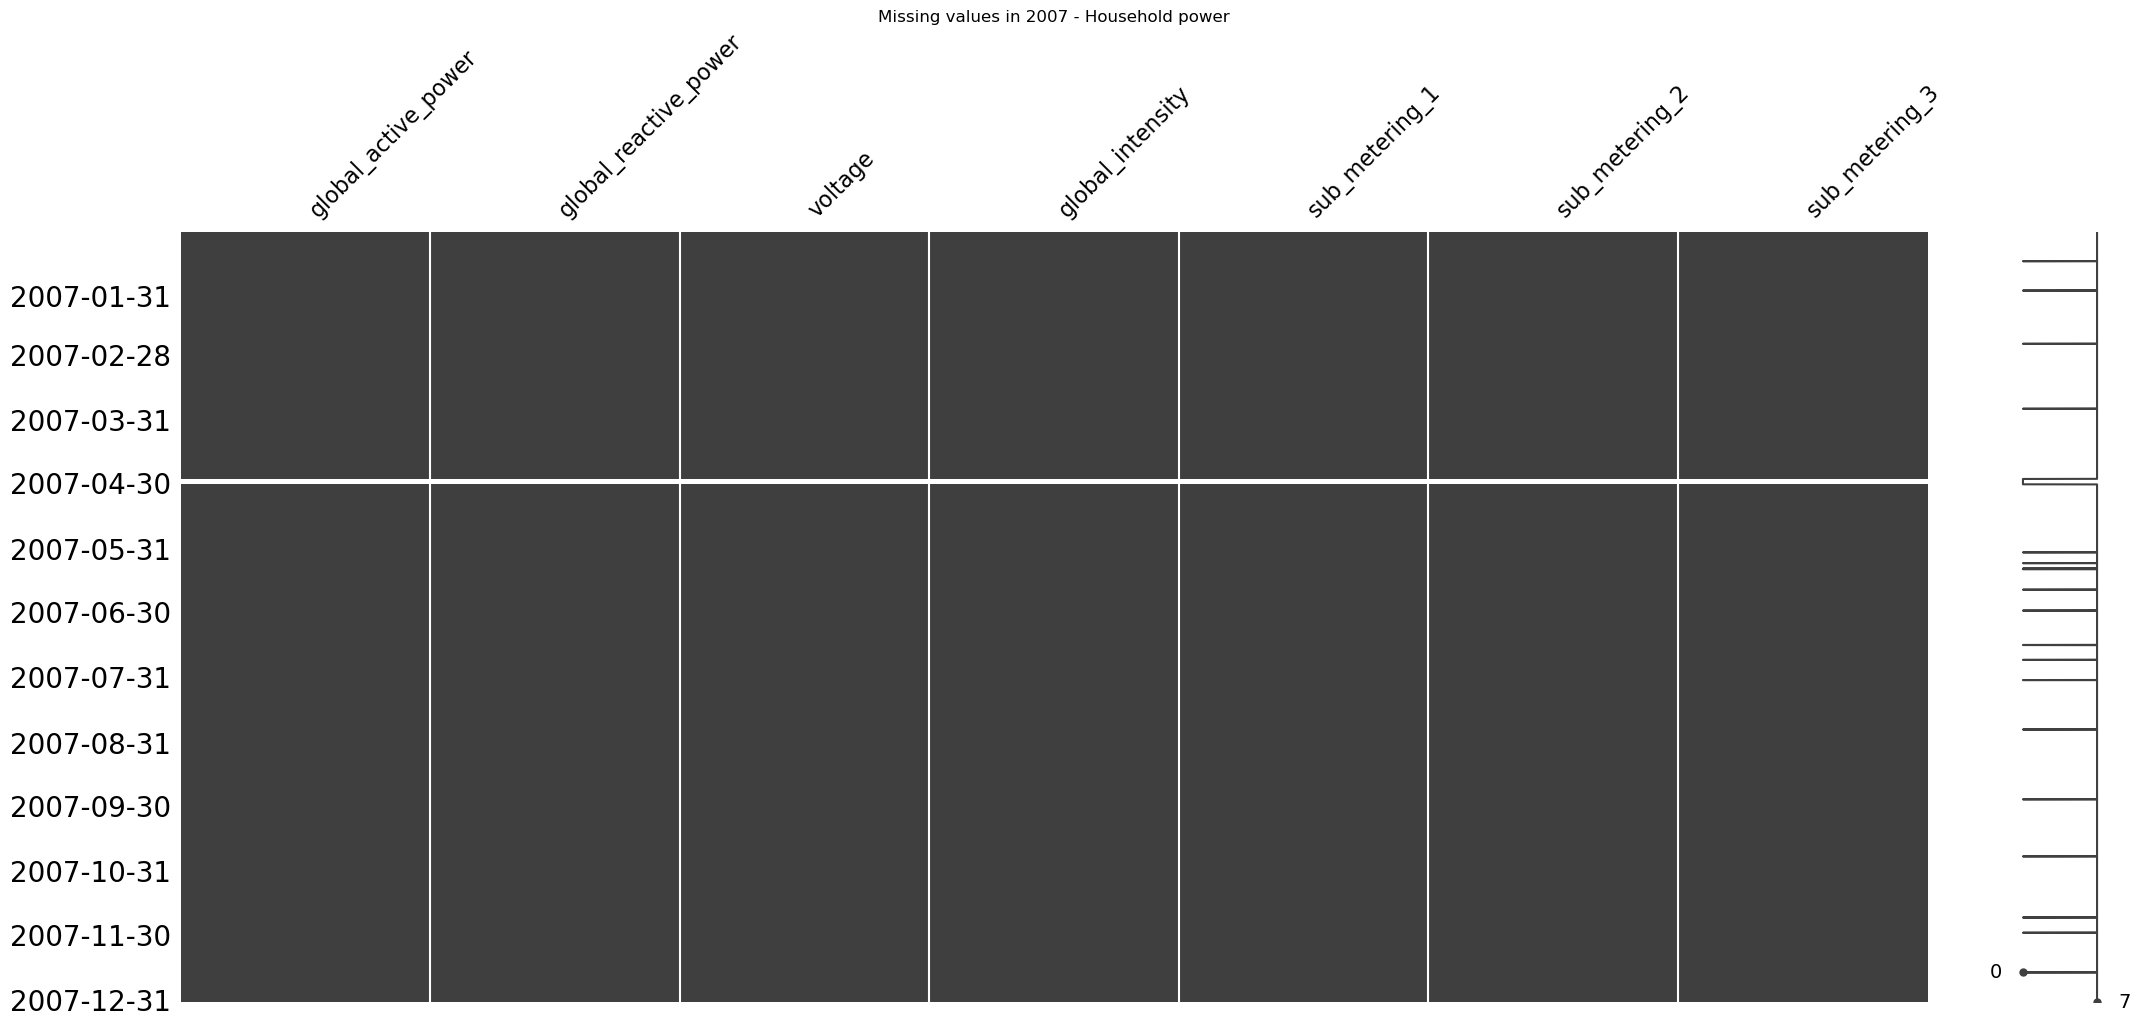

In [51]:
year = '2007'
msno.matrix(power_map[year], freq = 'M')
plt.title(f"Missing values in {year} - Household power")

In [52]:
na_mask = power_map[year]\
    .isnull()\
    .any(axis = 1)
na_mask.sum()

3931

In [53]:
power_map[year][na_mask].index

DatetimeIndex(['2007-01-14 18:36:00', '2007-01-28 17:13:00',
               '2007-02-22 22:58:00', '2007-02-22 22:59:00',
               '2007-03-25 17:52:00', '2007-04-28 00:21:00',
               '2007-04-28 00:22:00', '2007-04-28 00:23:00',
               '2007-04-28 00:24:00', '2007-04-28 00:25:00',
               ...
               '2007-01-08 08:31:00', '2007-01-08 08:32:00',
               '2007-08-24 18:23:00', '2007-09-26 20:55:00',
               '2007-09-26 20:56:00', '2007-10-23 21:53:00',
               '2007-10-23 21:54:00', '2007-11-21 21:04:00',
               '2007-11-29 02:57:00', '2007-12-17 22:11:00'],
              dtype='datetime64[ns]', name='date', length=3931, freq=None)

### 2008

There are some incomplete days

Text(0.5, 1.0, 'Missing values in 2008 - Household power')

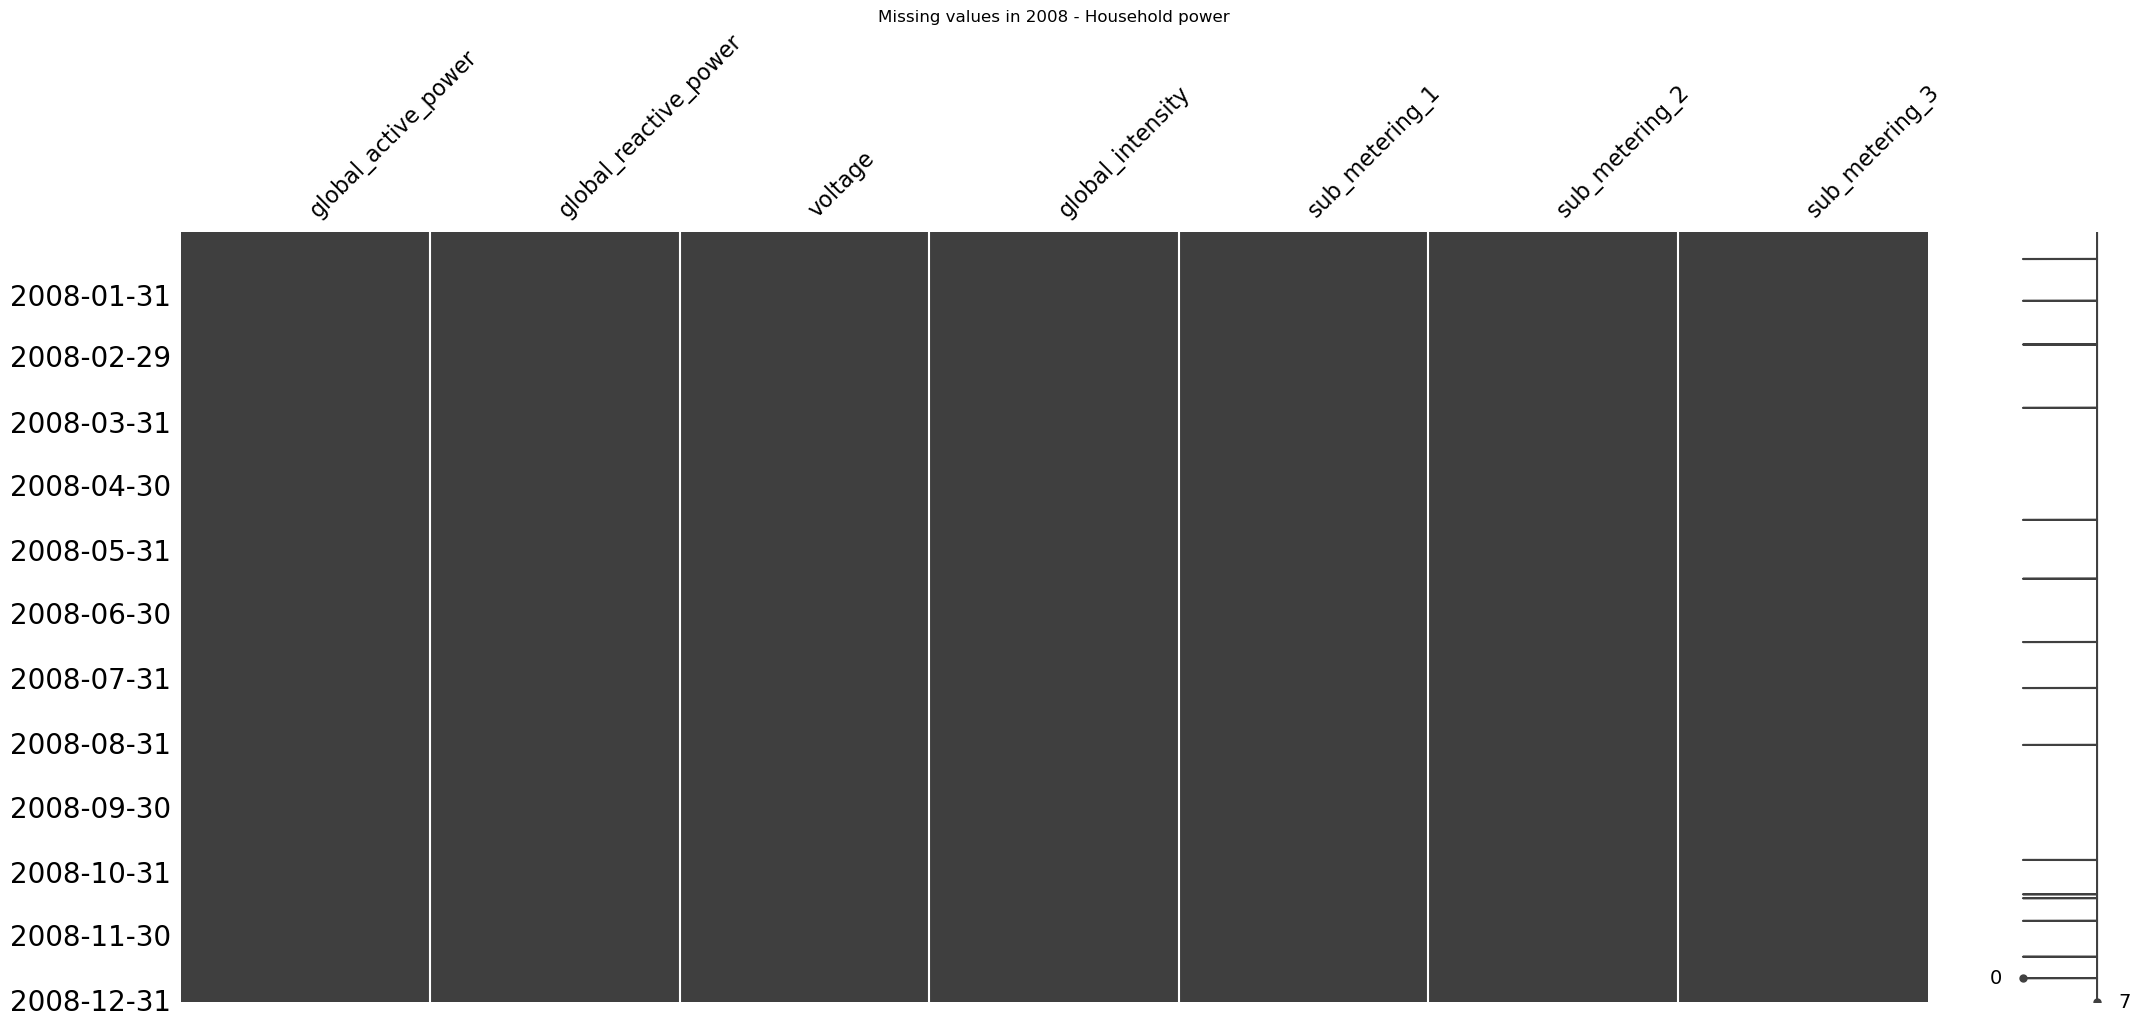

In [54]:
year = '2008'
msno.matrix(power_map[year], freq = 'M')
plt.title(f"Missing values in {year} - Household power")

In [55]:
na_mask = power_map[year]\
    .isnull()\
    .any(axis = 1)
na_mask.sum()

135

In [56]:
power_map[year][na_mask].index

DatetimeIndex(['2008-01-13 19:00:00', '2008-02-02 16:27:00',
               '2008-02-23 10:19:00', '2008-02-23 10:20:00',
               '2008-03-24 13:22:00', '2008-05-16 19:23:00',
               '2008-05-16 19:24:00', '2008-06-13 18:52:00',
               '2008-07-13 20:26:00', '2008-07-13 20:27:00',
               ...
               '2008-10-12 11:49:00', '2008-10-12 11:50:00',
               '2008-10-12 11:51:00', '2008-10-12 11:52:00',
               '2008-10-12 11:53:00', '2008-10-12 11:54:00',
               '2008-10-12 11:55:00', '2008-10-12 11:56:00',
               '2008-10-12 11:57:00', '2008-12-20 14:34:00'],
              dtype='datetime64[ns]', name='date', length=135, freq=None)

### 2009

There are some incomplete days

Text(0.5, 1.0, 'Missing values in 2009 - Household power')

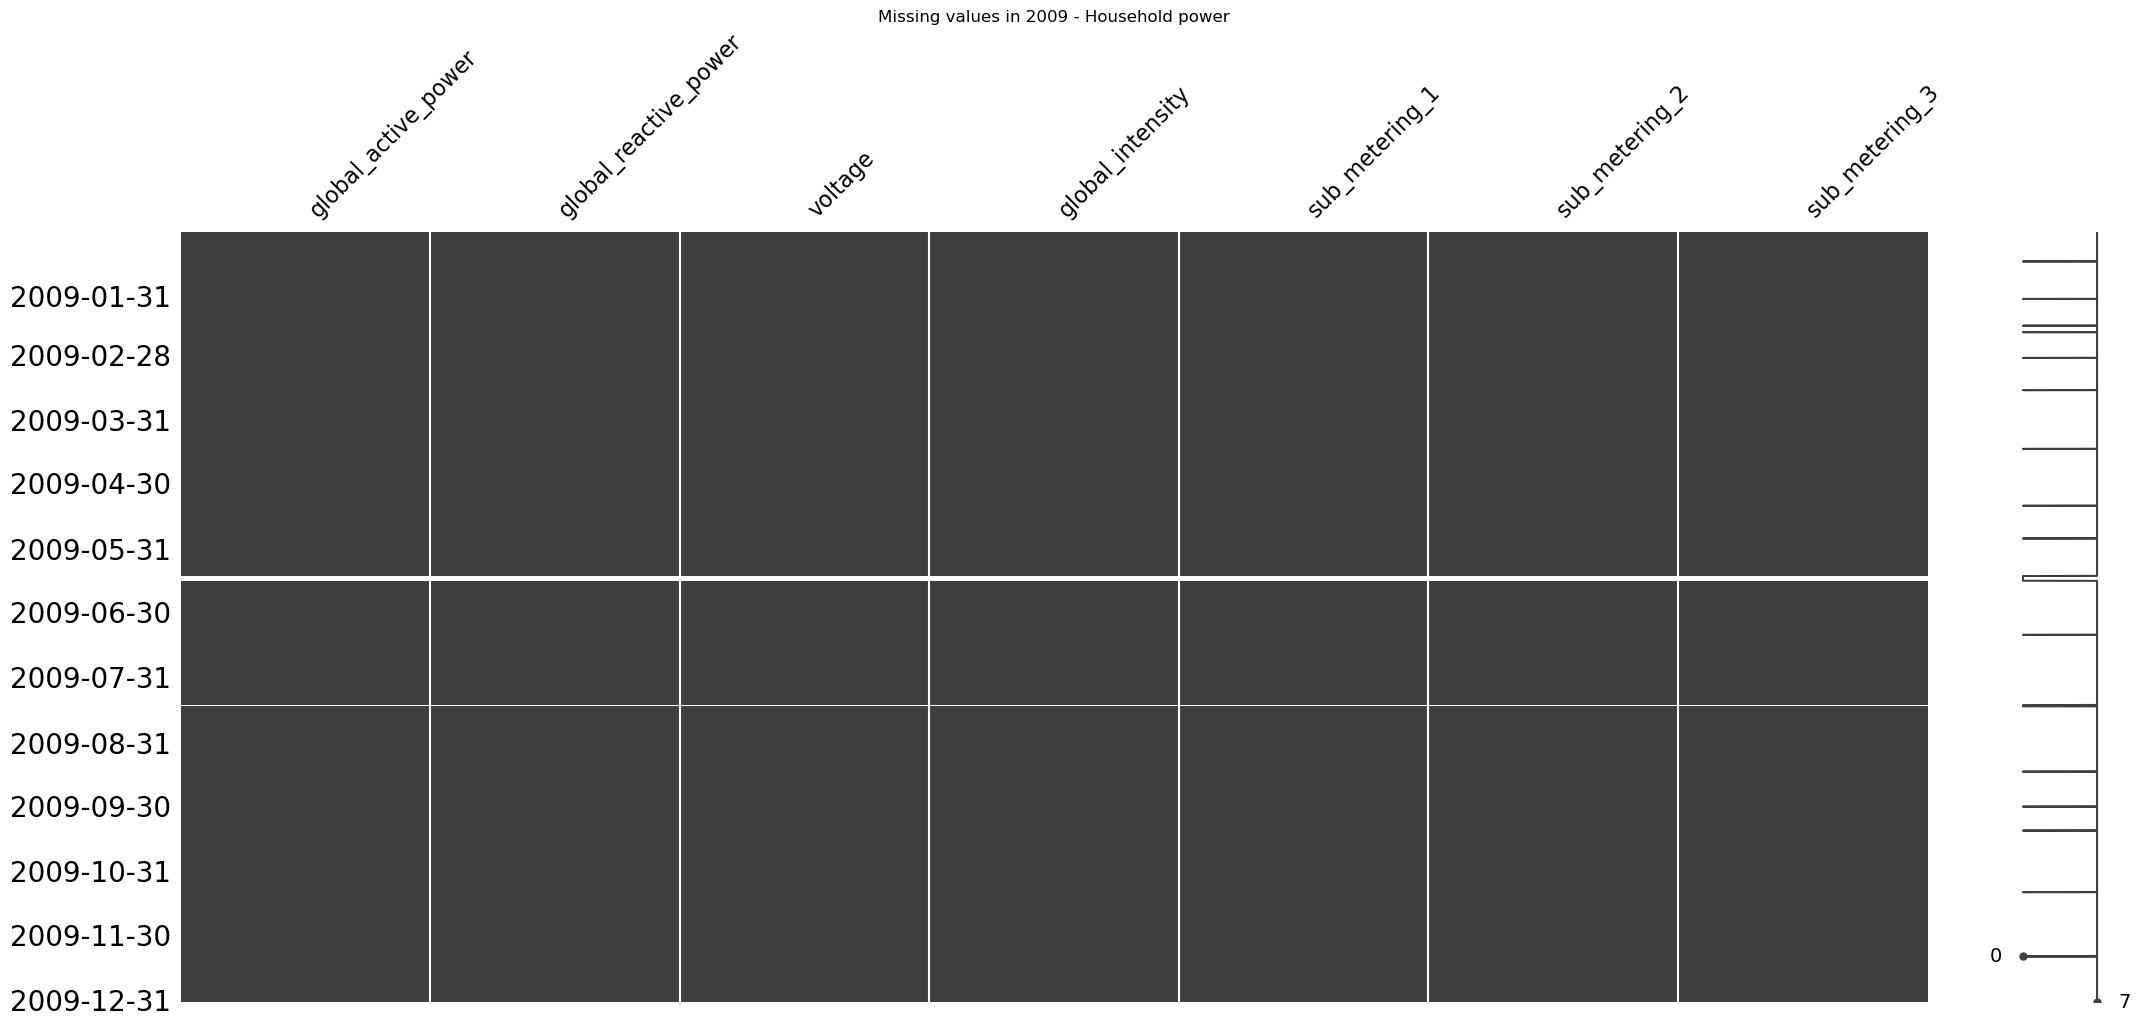

In [57]:
year = '2009'
msno.matrix(power_map[year], freq = 'M')
plt.title(f"Missing values in {year} - Household power")

In [58]:
na_mask = power_map[year]\
    .isnull()\
    .any(axis = 1)
na_mask.sum()

4280

In [59]:
power_map[year][na_mask].index

DatetimeIndex(['2009-01-14 21:10:00', '2009-01-02 16:29:00',
               '2009-01-02 16:30:00', '2009-01-02 16:31:00',
               '2009-01-02 16:32:00', '2009-01-02 16:33:00',
               '2009-01-02 16:34:00', '2009-01-02 16:35:00',
               '2009-01-02 16:36:00', '2009-01-02 16:37:00',
               ...
               '2009-08-13 19:48:00', '2009-08-13 19:49:00',
               '2009-08-13 19:50:00', '2009-09-13 18:35:00',
               '2009-09-30 08:48:00', '2009-09-30 08:49:00',
               '2009-11-10 17:07:00', '2009-09-11 20:39:00',
               '2009-10-12 08:26:00', '2009-10-12 08:27:00'],
              dtype='datetime64[ns]', name='date', length=4280, freq=None)

### 2010

There are some incomplete days

Text(0.5, 1.0, 'Missing values in 2010 - Household power')

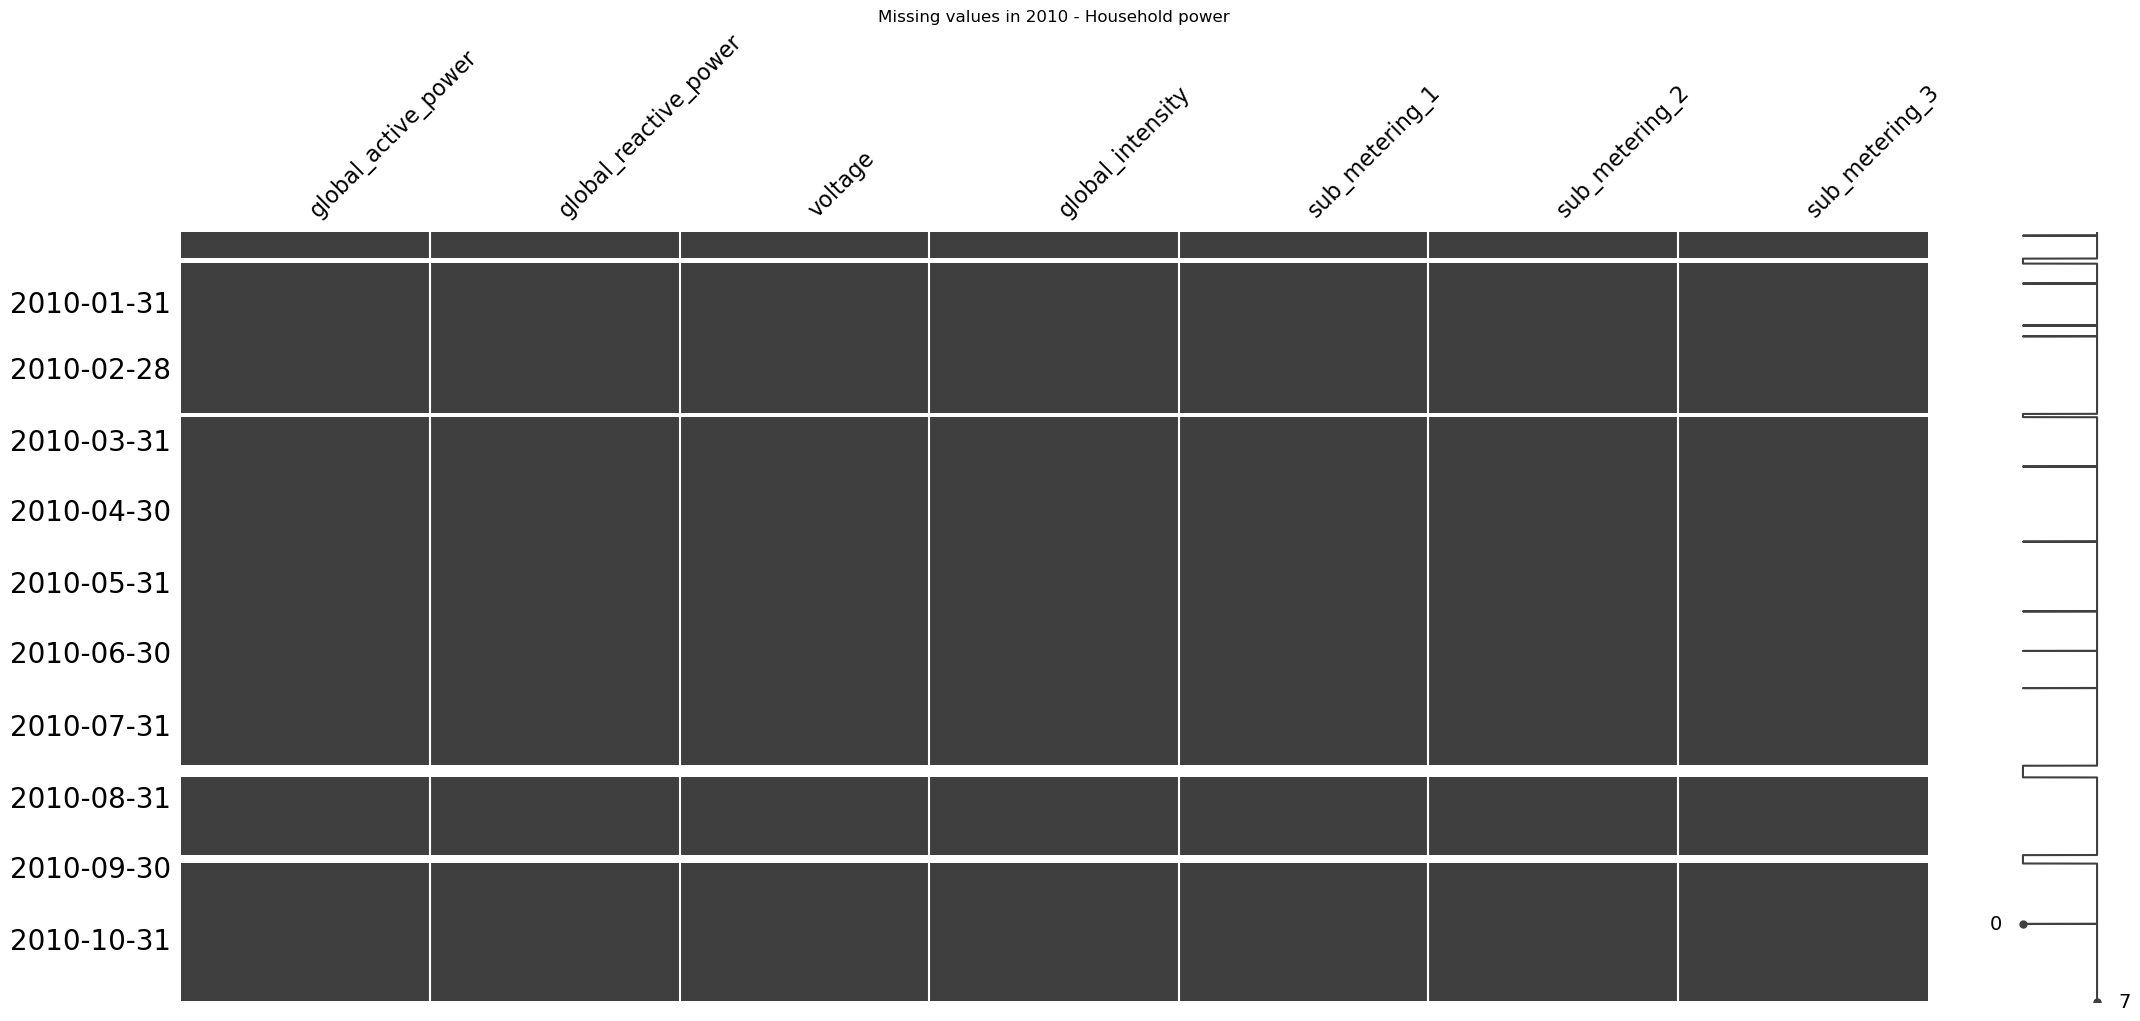

In [60]:
year = '2010'
msno.matrix(power_map[year], freq = 'M')
plt.title(f"Missing values in {year} - Household power")

In [61]:
na_mask = power_map[year]\
    .isnull()\
    .any(axis = 1)
na_mask.sum()

17629

In [62]:
power_map[year][na_mask].index

DatetimeIndex(['2010-02-01 18:51:00', '2010-12-01 14:53:00',
               '2010-12-01 14:54:00', '2010-12-01 14:55:00',
               '2010-12-01 14:56:00', '2010-12-01 14:57:00',
               '2010-12-01 14:58:00', '2010-12-01 14:59:00',
               '2010-12-01 15:00:00', '2010-12-01 15:01:00',
               ...
               '2010-09-28 19:04:00', '2010-09-28 19:05:00',
               '2010-09-28 19:06:00', '2010-09-28 19:07:00',
               '2010-09-28 19:08:00', '2010-09-28 19:09:00',
               '2010-09-28 19:10:00', '2010-09-28 19:11:00',
               '2010-09-28 19:12:00', '2010-10-24 15:35:00'],
              dtype='datetime64[ns]', name='date', length=17629, freq=None)

## Joining datasets

In [63]:
household_df = pd.concat(power_map.values())\
    .sort_index()

In [64]:
household_df

,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
date,,,,,,,
2007-01-01 00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
2007-01-01 00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2007-01-01 00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
2007-01-01 00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
2007-01-01 00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2010-12-11 23:55:00,0.690,0.062,244.16,2.8,0.0,0.0,0.0
2010-12-11 23:56:00,0.688,0.060,243.82,2.8,0.0,0.0,0.0
2010-12-11 23:57:00,0.688,0.062,244.20,2.8,0.0,0.0,0.0


## Removing outliers

In [65]:
household_df

,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
date,,,,,,,
2007-01-01 00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
2007-01-01 00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2007-01-01 00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
2007-01-01 00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
2007-01-01 00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2010-12-11 23:55:00,0.690,0.062,244.16,2.8,0.0,0.0,0.0
2010-12-11 23:56:00,0.688,0.060,243.82,2.8,0.0,0.0,0.0
2010-12-11 23:57:00,0.688,0.062,244.20,2.8,0.0,0.0,0.0


Text(0.5, 1.0, 'Boxplot - Household power')

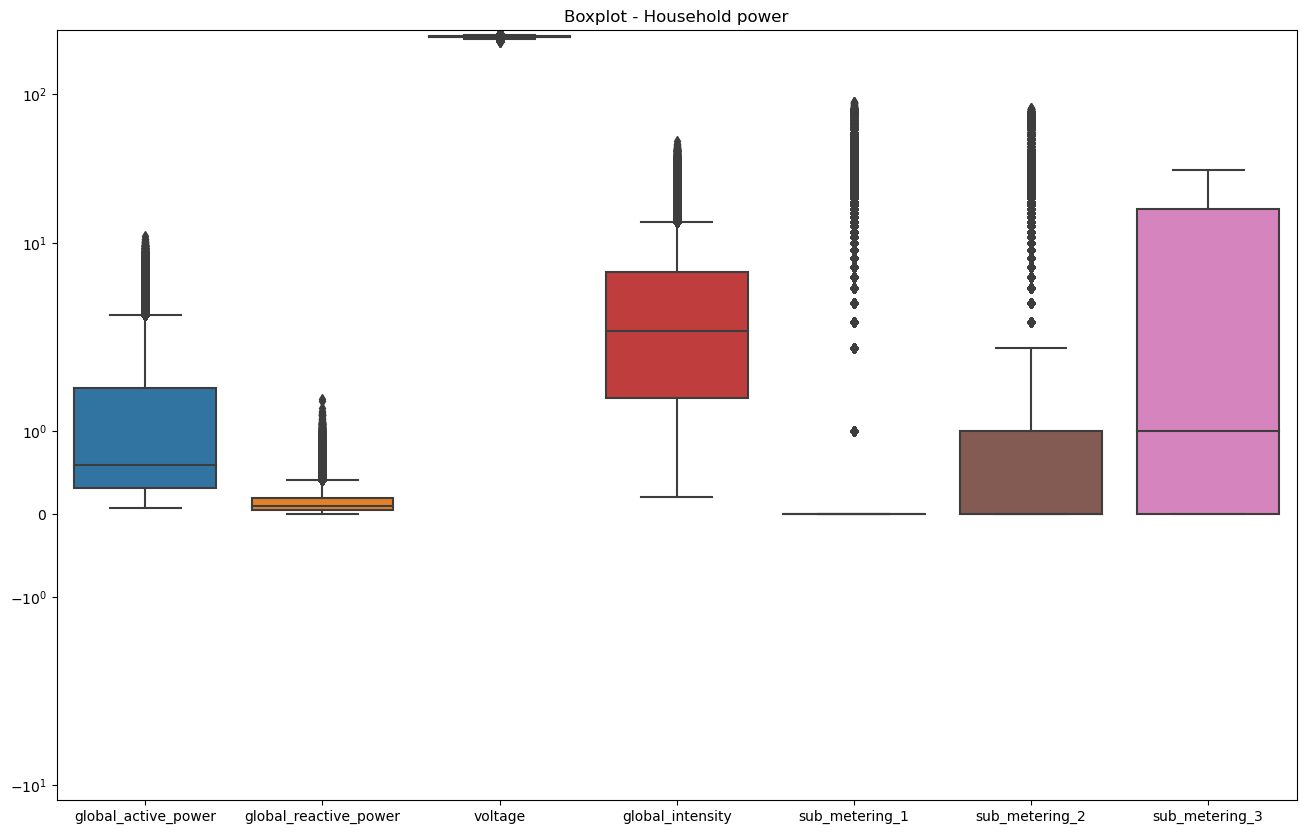

In [66]:
plt.figure(figsize=[16,10])
sns.boxplot(household_df)
plt.yscale('symlog')
plt.title("Boxplot - Household power")

In [67]:
z_score = (household_df-household_df.mean(axis = 0))/household_df.std(axis = 0)
(abs(z_score) > 2).sum(axis = 0)

global_active_power      104829
global_reactive_power     87128
voltage                  111241
global_intensity         104292
sub_metering_1            58933
sub_metering_2            54777
sub_metering_3            18153
dtype: int64

In [90]:
outliers_mask = ~(abs(z_score) > 3)
cleaned_household_df = household_df[outliers_mask]\
    .interpolate(method='linear')
# outliers_mask.replace(True, np.nan)

In [91]:

cleaned_household_df.rename_axis(index = 'date')\
    .to_pickle(
        os.path.join("data", "household_power_consumption", "cleaned_household_power.pkl")
    )